<a href="https://colab.research.google.com/github/kozz84/Udemy/blob/main/Machine_Learning_A_Z.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INTRO

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning A-Z/Part 1 - Data Preprocessing/Section 2 -------------------- Part 1 - Data Preprocessing --------------------/Python/Data.csv')

In [ ]:
#x = df.drop('Purchased', axis=1)
#x = df.iloc[:,0:3].values

x = df.iloc[:,:-1].values

np.nanmean(x[:,2],dtype='float32')

63777.777

In [ ]:
y = x = df.iloc[:,-1].values

In [ ]:
null_data = df[df.isnull().any(axis=1)]

In [ ]:
from sklearn.impute import SimpleImputer
sp = SimpleImputer(missing_values=np.nan, strategy='mean')

In [ ]:
sp.fit(x[:,1:3])

SimpleImputer()

In [ ]:
x[:,1:3]=sp.transform(x[:,1:3])

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0] )],remainder='passthrough')

In [ ]:
ct.fit(x)

ColumnTransformer(remainder='passthrough',
                  transformers=[('encoder', OneHotEncoder(), [0])])

In [ ]:
x = ct.transform(x)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
y=le.fit_transform(y)

In [ ]:
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X_train[:,3:])

StandardScaler()

In [ ]:
X_train[:,3:] = scaler.transform(X_train[:,3:])
X_train

array([[1.0, 0.0, 0.0, 0.9518263102018367, 0.9861483149559838],
       [0.0, 1.0, 0.0, 0.2630675731713777, 0.12381477472917465],
       [1.0, 0.0, 0.0, -0.253501479601474, 0.46175623287088036],
       [0.0, 0.0, 1.0, -0.08131179534386676, -0.1675141687344727],
       [1.0, 0.0, 0.0, -0.5978808481166885, -0.48214945028445844],
       [1.0, 0.0, 0.0, 1.6405850472322658, 1.7202971168288956],
       [0.0, 0.0, 1.0, 0.05261351463427554, -1.1114198518898115],
       [0.0, 0.0, 1.0, -1.9753983221776066, -1.530933452960047]],
      dtype=object)

In [ ]:
X_test = scaler.transform(X_test[:,3:])

# Linear Reg

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning A-Z/Part 2 - Regression/Section 4 - Simple Linear Regression/Python/Salary_Data.csv')

In [ ]:
df.head(1)

,YearsExperience,Salary
0,1.1,39343.0


In [ ]:
X= df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = lm.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

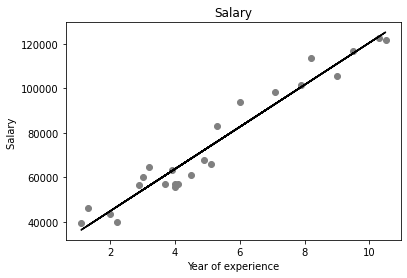

In [ ]:
plt.scatter(X_train, y_train, color='gray')
plt.plot(X_train, lm.predict(X_train),color='black')
plt.title('Salary')
plt.xlabel('Year of experience')
plt.ylabel('Salary ')
plt.show()

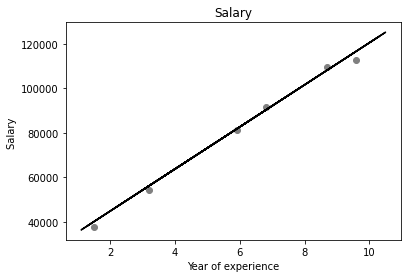

In [ ]:
plt.scatter(X_test, y_test, color='gray')
plt.plot(X_train, lm.predict(X_train),color='black')
plt.title('Salary')
plt.xlabel('Year of experience')
plt.ylabel('Salary ')
plt.show()

In [ ]:
lm.predict([[5]])

array([73242.38682565])

In [ ]:
print(lm.coef_)
print(lm.intercept_)

[9440.46383365]
26040.067657420906


# Multi linear

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning A-Z/Part 2 - Regression/Section 5 - Multiple Linear Regression/Python/50_Startups.csv')

In [ ]:
df['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [ ]:
df.head(1)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.2,136897.8,471784.1,New York,192261.83


In [ ]:
X= df.drop(['Profit','State'],axis=1)
y = df['Profit']
States_dummies = pd.get_dummies(df['State'],drop_first=True)
X= pd.concat([X,States_dummies], axis=1)
X = X.values
y = y.values


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [ ]:
pred = [160000,130000,300000,0,0]

In [ ]:
lm.fit(X_train,y_train)

LinearRegression()

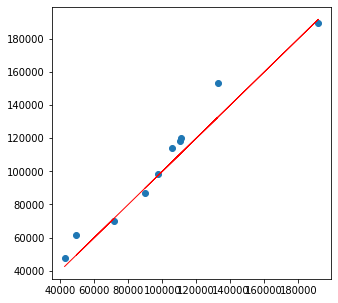

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(y_test,y_pred)
plt.plot(y_test,y_test, color='red', linewidth=1)
plt.show()

In [ ]:
print(lm.predict([[160000, 130000, 300000,0,0]]))

[182377.68153823]


In [ ]:
from sklearn import metrics

In [ ]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test,y_pred))
print(metrics.mean_squared_error(y_test,y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

6066.865715986147
66241729.62479818
8138.902237083216


In [ ]:
X= df.drop(['Profit'],axis=1)
y = df['Profit']

In [ ]:
States_dummies = pd.get_dummies(df['State'])

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),['State'])],remainder='passthrough')

In [ ]:
X = ct.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [ ]:
lm.fit(X_train,y_train)
X_train[0]

array([1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 7.8013110e+04,
       1.2159755e+05, 2.6434606e+05])

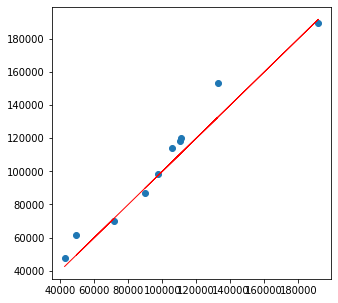

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(y_test,y_pred)
plt.plot(y_test,y_test, color='red', linewidth=1)
plt.show()

In [ ]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test,y_pred))
print(metrics.mean_squared_error(y_test,y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

7068.317931582249
83628721.142752
9144.874036461739


# Polynominal Regression

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
data = pd.read_csv('/content/drive/MyDrive/Machine Learning A-Z/Part 2 - Regression/Section 6 - Polynomial Regression/Python/Position_Salaries.csv')

In [28]:
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


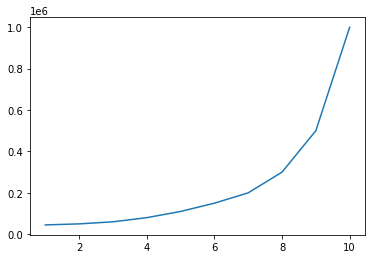

In [10]:
plt.plot(data['Level'],data['Salary'])

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
lg = LinearRegression()

In [18]:
lg.fit(data['Level'].values.reshape(-1,1),data['Salary'])

LinearRegression()

In [19]:
y_pred = lg.predict(data['Level'].values.reshape(-1,1))

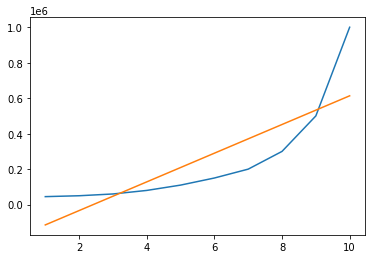

In [20]:
plt.plot(data['Level'],data['Salary'])
plt.plot(data['Level'],y_pred)

In [22]:
from sklearn.preprocessing import PolynomialFeatures

In [56]:
poly_reg = PolynomialFeatures(degree=4)

In [57]:
X_poly = poly_reg.fit_transform(data['Level'].values.reshape(-1,1))

In [58]:
X_poly

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

In [59]:
lr_poly = LinearRegression()

In [60]:
lr_poly.fit(X_poly, data['Salary'])

LinearRegression()

In [61]:
y_pred_2 = lr_poly.predict(X_poly)

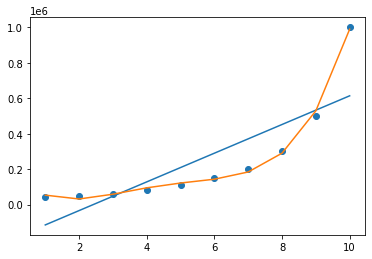

In [64]:
plt.scatter(data['Level'],data['Salary'])
plt.plot(data['Level'],y_pred)
plt.plot(data['Level'],y_pred_2)

In [94]:
def predict(x):
    print('Expected value:')
    print(data['Salary'][x])
    print('linear fit:')
    print(np.round(lg.predict([[x]])[0]))
    print('Polyfit fit:')
    print(np.round(lr_poly.predict(poly_reg.fit_transform(data['Level'].values.reshape(-1,1)))[0]))
predict(5)

Expected value:
150000
linear fit:
209061.0
Polyfit fit:
53357.0


In [75]:
lg.predict([[6.5],[5]])

array([330378.78787879, 209060.60606061])

In [90]:
data['Level'][5]

6

#SVR

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [96]:
data = pd.read_csv('/content/drive/MyDrive/Machine Learning A-Z/Part 2 - Regression/Section 6 - Polynomial Regression/Python/Position_Salaries.csv')

In [97]:
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [98]:
from sklearn.preprocessing import StandardScaler

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
X_train, X_test, y_train, y_test = train_test_split(data['Level'], data['Salary'], test_size=0.33, random_state=42)

In [110]:
scaler = StandardScaler()

In [111]:
y= scaler.fit_transform(data['Salary'].values.reshape(-1,1))

In [113]:
X = scaler.transform(data['Level'].values.reshape(-1,1))

In [114]:
X

array([[-0.87848357],
       [-0.87848005],
       [-0.87847653],
       [-0.87847301],
       [-0.87846949],
       [-0.87846596],
       [-0.87846244],
       [-0.87845892],
       [-0.8784554 ],
       [-0.87845188]])

In [116]:
from sklearn.svm import SVR

In [118]:
svreg = SVR(kernel = 'rbf')

In [119]:
svreg.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [134]:
y_pred_3 = scaler.inverse_transform([svreg.predict(X)])

ValueError: ignored

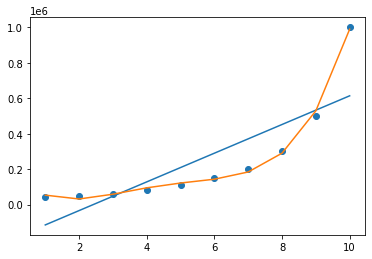

In [135]:
plt.scatter(data['Level'],data['Salary'])
plt.plot(data['Level'],y_pred)
plt.plot(data['Level'],y_pred_2)
plt.plot(data['Level'],y_pred_3)